[View in Colaboratory](https://colab.research.google.com/github/kaddalasiva/mlcc/blob/master/Copy_of_Logistic_Regression_Work_Model.ipynb)

# PRACTICAL IMPLEMENTATION OF LOGISTIC REGRESSION

**THEME**

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Attribute Information:

    1. Pregnancies    :   continuous
    2. Glucose        :   continuous
    3. Blood Pressure :   continuous
    4. Skin Thickness :   continuous
    5. Insulin        :   continuous
    6. BMI            :   continuous
    7. DiabetesPedigreeFunction:   continuous
    8. Age            :   continuous
    9. Outcome        :   discrete

# LOGISTIC REGRESSION

**Logistic regression** is the appropriate regression analysis to conduct when the dependent or target variable is discrete (binary).  

Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

![alt text](https://miro.medium.com/max/960/1*UgYbimgPXf6XXxMy2yqRLw.png)

# PULLING THE DATASET 

In [0]:
# importing the pandas package
import pandas as pd

In [0]:
#loading the dataset from the resource link provided to you
dataframe = pd.read_csv('https://piazza.com/class_profile/get_resource/jm8mdtr0laj6jv/jmlhdafl9wh6u6')

In [3]:
#peeking through a dataset in an abstract way
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**SUMMARY STATISTICS**

In [4]:
#summary statistics
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**ELABORATING THE ELEMENTS IN THE DATASET**




In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATA VISUALIZATION

IMPORTANT INFORMATION

[SEABORN](https://seaborn.pydata.org/index.html)

[PAIRPLOT](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [0]:
# facilitated by the seaborn package 
import seaborn as sns

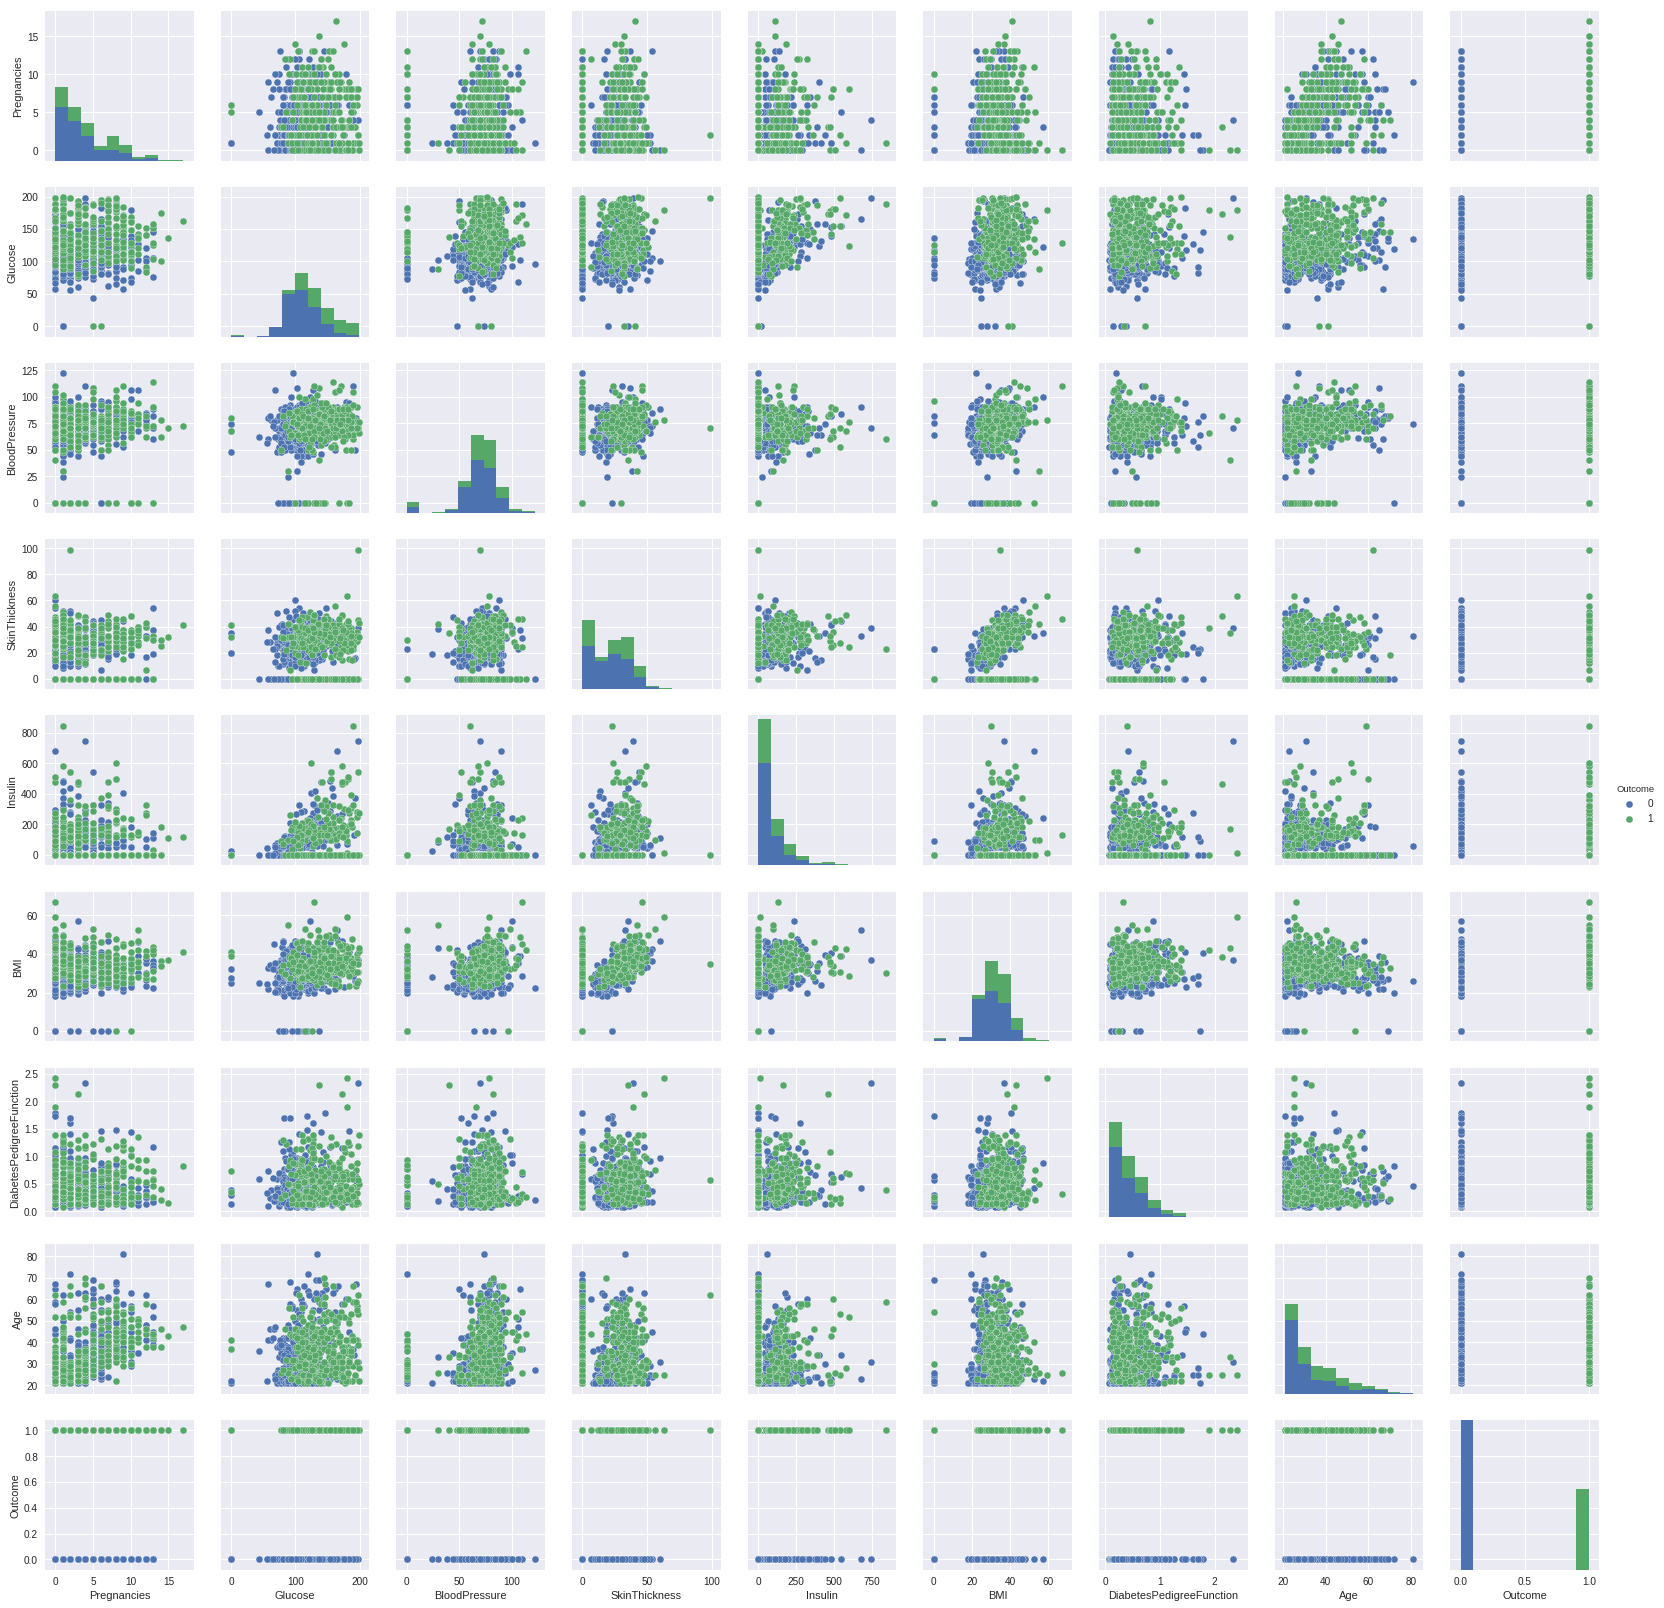

In [7]:
#illustrating a pairplot 
sns.pairplot(data=dataframe,hue='Outcome')

# ACTIVITY

We would like you to send your inferences that you get from the visualization above.

[QUIZ](https://goo.gl/forms/WwwQUKOcNAGGGfb23)

**CHECKING FOR ANOMALIES IN THE DATASET**

In [8]:
#counting the number of null values in the dataset
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
#segregating the features and the target variable from the input dataset
target = dataframe['Outcome']
features = dataframe.drop('Outcome',axis=1)

**TRAIN AND TEST SPLIT**

In [0]:
#importing sklearn.model_selection
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,train_size=0.8)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf_fit = clf.fit(X_train,y_train)
clf_pred = clf_fit.predict(X_test)

# MODEL EVALUATION

The Model is evaluated by noting the performance of the model aganist the standard performance metrics of the **Classification**

**Precision** , tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

**Recall**, (sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

**F1Score**, is the 2*(( Precision x Recall )/( Precision + Recall )). It is also called the F Score or the F Measure. Simply, the F1 score conveys the balance between the precision and the recall.


**Confusion Matrix :- **

A clean and unambiguous way to present the prediction results of a classifier is to use a confusion matrix (also called a contingency table).

For a binary classification problem the table has 2 rows and 2 columns. Across the top is the observed class labels and down the side are the predicted class labels. Each cell contains the number of predictions made by the classifier that fall into that cell.

   Positive  |Negative
             --- | ---
  True Positive | False Positive
  False Negative |True Negative

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# recording the performance of the model
print(classification_report(y_test,clf_pred))

             precision    recall  f1-score   support

          0       0.74      0.89      0.81        96
          1       0.72      0.48      0.58        58

avg / total       0.73      0.73      0.72       154

